In [1]:
import pandas as pd
import nosc_util
import seaborn as sns
import numpy as np

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
# Read in a combined dataframe of all the coding sequence NOSC values.
long_nosc_df = pd.read_csv('../data/genomes/all_ref_prot_NOSC.csv')
long_nosc_df.head()

,organism,primary_accession,gene_name,description,GO_terms,COG_ids,fraction_transmembrane,NOSC,num_aas,NC,Ce_total,eC_ratio,ribosomal_protein,aminoacyl_tRNA_synthetase,amino_acid_biosynthesis,fatty_acid_biosynthesis,primary_COG_category,secondary_COG_category
0,coli,A5A605,ykfM,Uncharacterized protein YkfM,"GO:0016020,GO:0006974,GO:0046677",ENOG5031M8I,0.377358,-0.349478,159,862.0,-301.25,4.349478,False,False,False,False,NaN,NaN
1,coli,P02929,tonB,Protein TonB,"GO:0030313,GO:0009279,GO:0030288,GO:0005886,GO...",COG0810,0.129707,-0.208150,239,1173.0,-244.16,4.208150,False,False,False,False,M,NaN
2,coli,P05523,mutM,Formamidopyrimidine-DNA glycosylase,"GO:0034039,GO:0140078,GO:0003684,GO:0019104,GO...",COG0266,0.000000,-0.170685,269,1358.0,-231.79,4.170685,False,False,False,False,L,NaN
3,coli,P06611,btuD,Vitamin B12 import ATP-binding protein BtuD,"GO:0043190,GO:1990191,GO:0019898,GO:0015420,GO...",COG4138,0.000000,-0.132733,249,1189.0,-157.82,4.132733,False,False,False,False,H,NaN
4,coli,P07109,hisP,Histidine transport ATP-binding protein HisP,"GO:0055052,GO:0015424,GO:0005524,GO:0005291,GO...",COG4598,0.000000,-0.159415,257,1266.0,-201.82,4.159415,False,False,False,False,E,NaN


In [3]:
# Load coli genome data
mask = long_nosc_df.fraction_transmembrane < 0.05
soluble_nosc_df = long_nosc_df[mask]
soluble_nosc_df.head()

,organism,primary_accession,gene_name,description,GO_terms,COG_ids,fraction_transmembrane,NOSC,num_aas,NC,Ce_total,eC_ratio,ribosomal_protein,aminoacyl_tRNA_synthetase,amino_acid_biosynthesis,fatty_acid_biosynthesis,primary_COG_category,secondary_COG_category
2,coli,P05523,mutM,Formamidopyrimidine-DNA glycosylase,"GO:0034039,GO:0140078,GO:0003684,GO:0019104,GO...",COG0266,0.0,-0.170685,269,1358.0,-231.79,4.170685,False,False,False,False,L,NaN
3,coli,P06611,btuD,Vitamin B12 import ATP-binding protein BtuD,"GO:0043190,GO:1990191,GO:0019898,GO:0015420,GO...",COG4138,0.0,-0.132733,249,1189.0,-157.82,4.132733,False,False,False,False,H,NaN
4,coli,P07109,hisP,Histidine transport ATP-binding protein HisP,"GO:0055052,GO:0015424,GO:0005524,GO:0005291,GO...",COG4598,0.0,-0.159415,257,1266.0,-201.82,4.159415,False,False,False,False,E,NaN
5,coli,P07648,recC,RecBCD enzyme subunit RecC,"GO:0009338,GO:0005524,GO:0003677,GO:0003678,GO...",COG1330,0.0,-0.132318,1122,5786.0,-765.59,4.132318,False,False,False,False,L,NaN
6,coli,P09557,dicB,Division inhibition protein DicB,"GO:0007049,GO:0051301,GO:0051782,GO:0051302",ENOG5031KUY,0.0,-0.212053,62,302.0,-64.04,4.212053,False,False,False,False,NaN,NaN


-0.1913619619205298 -0.11501208164520042


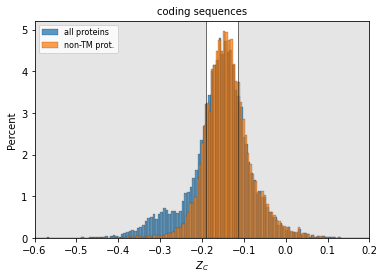

In [4]:
plt.figure()
pal = sns.color_palette()
sns.histplot(data=long_nosc_df, x='NOSC', color=pal[0], stat='percent', label='all proteins')
sns.histplot(data=soluble_nosc_df, x='NOSC', color=pal[1], stat='percent', label='non-TM prot.')

genome_lb, genome_ub = long_nosc_df.NOSC.quantile([0.25, 0.75])
print(genome_lb, genome_ub)
plt.axvspan(-0.7, genome_lb, color='grey', alpha=0.2)
plt.axvspan(genome_ub, 0.3, color='grey', alpha=0.2)
plt.axvline(genome_lb, color='k', lw=0.5)
plt.axvline(genome_ub, color='k', lw=0.5)
plt.xlim(-0.6, 0.2)
plt.title('coding sequences', fontsize=10)
plt.xlabel('$Z_C$')
plt.legend(loc=2, fontsize=8)

plt.show()

Linear R = 0.998363148486118


/var/folders/h9/fvnb4xnn63qg71jx6ncvg62w0000gn/T/ipykernel_16068/1096575310.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]
/var/folders/h9/fvnb4xnn63qg71jx6ncvg62w0000gn/T/ipykernel_16068/1096575310.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slope, resid, _, _ = np.linalg.lstsq(x, y)


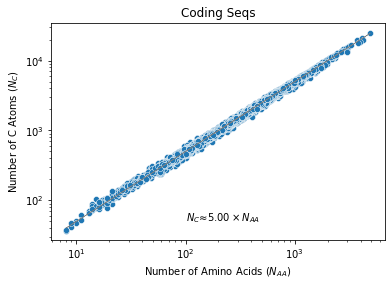

In [5]:
# number of aas should be strongly correlated with number of C atoms
mask = np.logical_and(long_nosc_df.NC.notnull(),
                      long_nosc_df.num_aas.notnull())

x = long_nosc_df[mask].num_aas
y = long_nosc_df[mask].NC
R = np.corrcoef(x, y)[0,1]
print('Linear R =', R)

x = x[:,np.newaxis]
slope, resid, _, _ = np.linalg.lstsq(x, y)

plt.figure()
plt.xscale('log')
plt.yscale('log')
sns.scatterplot(data=long_nosc_df, x='num_aas', y='NC')

plt.plot(x, slope*x, ls='-', color='grey', lw=0.5)
plt.xlabel('Number of Amino Acids ($N_{AA}$)')
plt.ylabel('Number of C Atoms ($N_C$)')
plt.title('Coding Seqs')
plt.text(100, 50, '$N_C ≈ {0:.2f}\\times N_{{AA}}$'.format(slope[0]))

plt.show()

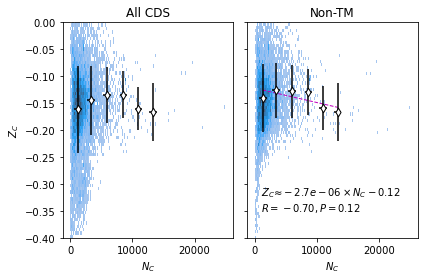

In [6]:
fig, axs = plt.subplots(ncols=2, sharey=True, sharex=True)
plt.sca(axs[0])

sns.histplot(data=long_nosc_df, x='NC', y='NOSC')

# binned means of NC and NOSC
bins = pd.cut(long_nosc_df.NC, 10)
bin_counts = long_nosc_df.groupby(bins).count()
mask = bin_counts.gene_name > 10

bin_means = long_nosc_df.groupby(bins).mean()
bin_stds = long_nosc_df.groupby(bins).std()

bin_means = bin_means[mask]
bin_stds = bin_stds[mask]

plt.errorbar(bin_means.NC, bin_means.NOSC,
             xerr=bin_stds.NC, yerr=bin_stds.NOSC, 
             ecolor='k', ls='', marker='', zorder=8)
plt.scatter(bin_means.NC, bin_means.NOSC, marker='d', edgecolors='k', lw=1, color='w', zorder=10)


plt.title('All CDS')
plt.xlabel('$N_C$')
plt.ylabel('$Z_C$')


plt.sca(axs[1])
sns.histplot(data=soluble_nosc_df, x='NC', y='NOSC')

bins = pd.cut(soluble_nosc_df.NC, 10)
bin_counts = soluble_nosc_df.groupby(bins).count()
mask = bin_counts.gene_name > 10

bin_means = soluble_nosc_df.groupby(bins).mean()
bin_stds = soluble_nosc_df.groupby(bins).std()

bin_means = bin_means[mask]
bin_stds = bin_stds[mask]
non_TM_bin_means = bin_means.copy()
non_TM_bin_stds = bin_stds.copy()

plt.errorbar(bin_means.NC, bin_means.NOSC,
             xerr=bin_stds.NC, yerr=bin_stds.NOSC, 
             ecolor='k', ls='', marker='', zorder=8)
plt.scatter(bin_means.NC, bin_means.NOSC, marker='d', edgecolors='k', lw=1, color='w', zorder=10)

# Fit the length dependence of ZC. 
NC_ZC_reg = stats.linregress(non_TM_bin_means.NC, non_TM_bin_means.NOSC)
pred_nosc = lambda NC: NC_ZC_reg.slope*NC + NC_ZC_reg.intercept

plt.plot(non_TM_bin_means.NC, pred_nosc(non_TM_bin_means.NC),
         color='m', lw=1, ls='--')
plt.text(1000, -0.35, '$Z_C ≈ {0:.2g}\\times N_{{C}} {1:.2f}$\n$R={2:.2f}, P={3:.2g}$'.format(
    NC_ZC_reg.slope, NC_ZC_reg.intercept, NC_ZC_reg.rvalue, NC_ZC_reg.pvalue))


plt.title('Non-TM')
plt.ylim(-0.4, 0)
#plt.xlim(0, 8000)
plt.xlabel('$N_C$')
plt.tight_layout()
plt.show()

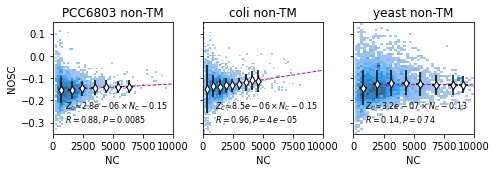

In [7]:
fig, axs = plt.subplots(ncols=3, figsize=(7, 2.5), sharey=True, sharex=True)
for i, (org, gdf) in enumerate(soluble_nosc_df.groupby('organism')):
    plt.sca(axs[i])
    sns.histplot(data=gdf, x='NC', y='NOSC')
    plt.title(org + ' non-TM')
    
    bins = pd.cut(gdf.NC, 20)
    bin_counts = gdf.groupby(bins).count()
    mask = bin_counts.gene_name > 15

    bin_means = gdf.groupby(bins).mean()
    bin_stds = gdf.groupby(bins).std()

    bin_means = bin_means[mask]
    bin_stds = bin_stds[mask]

    plt.errorbar(bin_means.NC, bin_means.NOSC,
                 xerr=bin_stds.NC, yerr=bin_stds.NOSC, 
                 ecolor='k', ls='', marker='', zorder=8)
    plt.scatter(bin_means.NC, bin_means.NOSC, marker='d', edgecolors='k', lw=1, color='w', zorder=10)

    # Fit the length dependence of ZC. 
    reg = stats.linregress(bin_means.NC, bin_means.NOSC)
    pred_nosc = lambda NC: reg.slope*NC + reg.intercept
    
    plt.plot(non_TM_bin_means.NC, pred_nosc(non_TM_bin_means.NC),
         color='m', lw=1, ls='--')
    plt.text(1000, -0.3, '$Z_C ≈ {0:.2g}\\times N_{{C}} {1:.2f}$\n$R={2:.2f}, P={3:.2g}$'.format(
        reg.slope, reg.intercept, reg.rvalue, reg.pvalue), fontsize=8)
    
plt.xlim(0, 10000)
plt.ylim(-0.35, 0.15)
plt.tight_layout()
plt.savefig('../output/NOSC_length_dep_by_genome.png', dpi=600, facecolor='w')
plt.show()
